# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [2]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
#from ipywidgets import interactive
#import ipywidgets as widgets
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
absent = pd.read_csv("../data/absences.csv")
absent

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9
5,5,6,58,7
6,6,7,29,14
7,7,8,36,11
8,8,9,64,5
9,9,10,40,8


In [8]:

abs_edit = absent.drop(["Unnamed: 0"],axis=1)

abs_edit

,EmployeeID,Age,Absences
0,1,27,15
1,2,61,6
2,3,37,10
3,4,23,18
4,5,46,9
5,6,58,7
6,7,29,14
7,8,36,11
8,9,64,5
9,10,40,8


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

It seems there is a negative correlation between Age & Absences


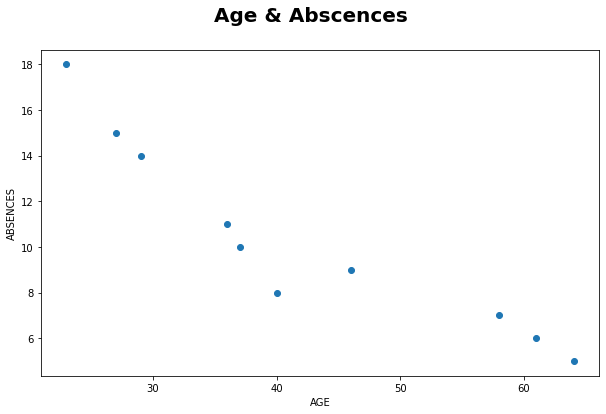

In [13]:

fig, ax = plt.subplots(1,1,figsize = (10,6))

fig.suptitle('Age & Abscences', fontsize=20, fontweight='bold')

ax.scatter(abs_edit["Age"],abs_edit["Absences"])

ax.set_xlabel("AGE",fontsize=10)

ax.set_ylabel("ABSENCES",fontsize=10);

print("It seems there is a negative correlation between Age & Absences")

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [14]:
x = np.array(abs_edit["Age"]) 
y = np.array(abs_edit["Absences"])


In [17]:
def slope_inter(x,y):
    b = (np.mean(x*y) - (np.mean(x) * np.mean(y))) / (np.mean(np.power(x, 2)) - np.power(np.mean(x), 2)) #slope
    a = np.mean(y) - (np.mean(x) * b) # interecept
    return a,b



#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [22]:
i,s = slope_inter(x, y)

print(f"Slope: {s}\nIntercept: {i}")

Slope: -0.26810883370334093
Intercept: 21.587381898910657


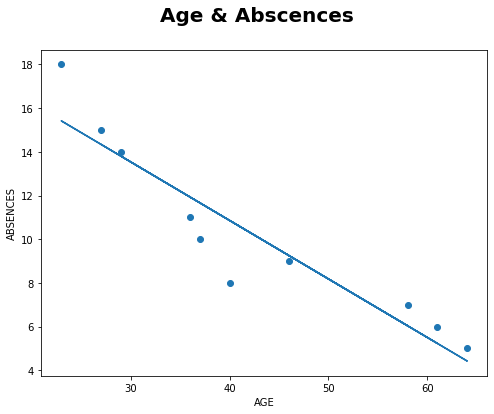

In [24]:
fig, ax = plt.subplots(1,1,figsize = (8,6))


fig.suptitle('Age & Abscences', fontsize=20, fontweight='bold')
ax.scatter(x,y)
ax.set_xlabel("AGE",fontsize=10)
ax.set_ylabel("ABSENCES",fontsize=10)
plt.plot(x, i+s*x)
plt.show()

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [33]:
def covar_correlation(x,y):
    n = len(x)
    cov_xy = sum([(x[i] - np.mean(x))*(y[i] - np.mean(y)) for i in list(range(0,n))])/(n-1)
    stedv_x = np.std(x,ddof=1)
    stdev_y = np.std(y,ddof=1)
    corr_xy = cov_xy/(stedv_x*stdev_y) 
    return print(f"Covariance: {cov_xy}\nCorrelation: {corr_xy}")


#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [34]:
covar_correlation(x, y)

Covariance: -57.699999999999996
Correlation: -0.9325434092481012


#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

It seems there's a very strong correlation between age and absenteeism.<br>
<br>
Therefore, the older they are, the less likely to be absent from work.


## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [38]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

x =ironbeers_df.X
y= ironbeers_df.Y

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [42]:

c,d = covar_correlation(ironbeers_df["X"],ironbeers_df["Y"])

print(f"Correlation = {d}")
print(f"Covariance = {c}")


Covariance: 12.0
Correlation: 0.9770084209183943


TypeError: cannot unpack non-iterable NoneType object

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

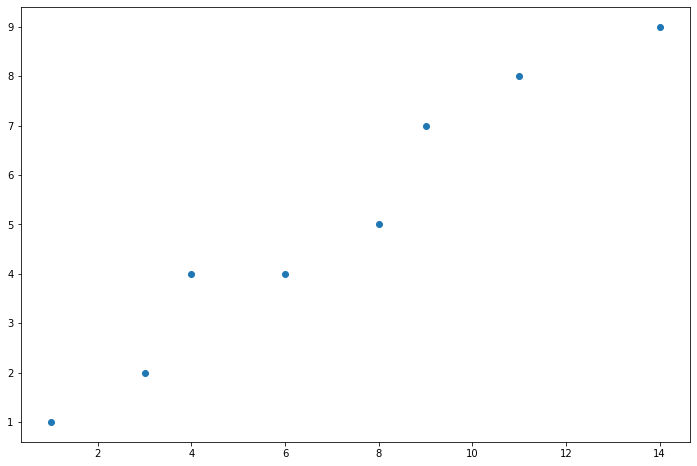

In [44]:
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(ironbeers_df["X"], ironbeers_df["Y"])

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [46]:
i2,f2 = slope_inter(ironbeers_df["X"], ironbeers_df["Y"])

print(f"The slope is: {f2}")
print(f"The intercept is: {i2}")


The slope is: 0.6363636363636364
The intercept is: 0.5454545454545459


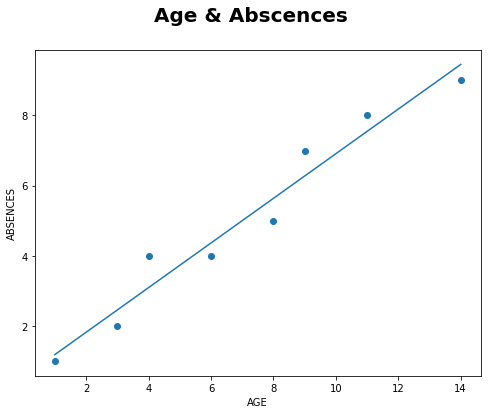

In [47]:
fig, ax = plt.subplots(1,1,figsize = (8,6))


fig.suptitle('Age & Abscences', fontsize=20, fontweight='bold')
ax.scatter(x,y)
ax.set_xlabel("AGE",fontsize=10)
ax.set_ylabel("ABSENCES",fontsize=10)
plt.plot(x, i2+f2*x)
plt.show()

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

,X,Y,expected_Y
0,1,1,1.181818
1,3,2,2.454545
2,4,4,3.090909
3,6,4,4.363636
4,8,5,5.636364
5,9,7,6.272727
6,11,8,7.545455
7,14,9,9.454545


R2_score: 0.9545454545454548


#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

,X,Y,expected_Y,error
0,1,1,1.181818,-0.181818
1,3,2,2.454545,-0.454545
2,4,4,3.090909,0.909091
3,6,4,4.363636,-0.363636
4,8,5,5.636364,-0.636364
5,9,7,6.272727,0.727273
6,11,8,7.545455,0.454545
7,14,9,9.454545,-0.454545


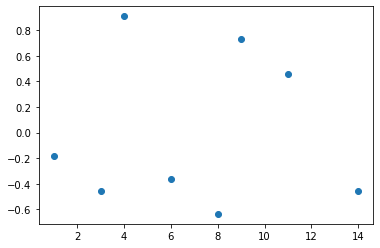

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# comment here

#### 4.- Remove the points with a high error (0.6 threshold) and recalculate the regression line.

In [49]:
# your code here 


,X,Y,expected_Y,error
0,1,1,1.181818,-0.181818
1,3,2,2.454545,-0.454545
2,6,4,4.363636,-0.363636
3,8,5,5.636364,-0.636364
4,11,8,7.545455,0.454545
5,14,9,9.454545,-0.454545


Plot before deleting higher error data points: 


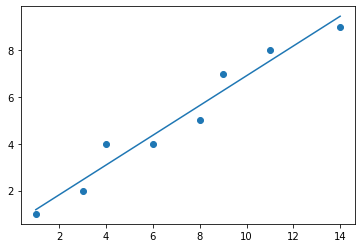

Plot after deleting higher error data points: 


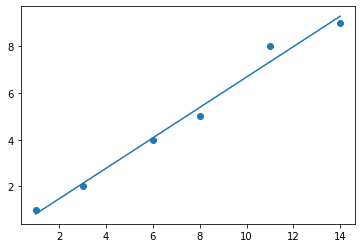

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here


Covariance and correlation before deleting higher error data points: 


(12.0, 0.9770084209183943)

Covariance and correlation after deleting higher error data points: 


(15.433333333333332, 0.9928560954470167)

In [87]:
# your comments here

